# Homework_03_kMeans

## 1.不使用特征变换进行分类
### (1) 导入第三方库

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import math

### (2) 导入数据并预处理
此处将原表格中数据进行标记，并储存为新数据然后再导入

In [2]:
data=pd.read_csv('dataset_circles.csv',header=None,names=['x','y','labelnum']) #给数据添加分类标签x,y,labelnum
data.to_csv('dataset_circles_labeled.csv',index=False) #储存为新文件
data_new=pd.read_csv('dataset_circles_labeled.csv')

### (3) 原数据展示

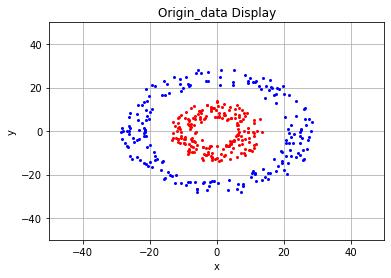

In [3]:
#可视化数据函数
def visualise_data(data):
    plt.axis([-50,50,-50,50])
    ar=np.shape(data)
    for i in range(ar[0]):
        if data['labelnum'][i]==0.0:
            plt.plot(data['x'][i],data['y'][i],'ro',markersize=2)
        else:
            plt.plot(data['x'][i],data['y'][i],'bo',markersize=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title('Origin_data Display')
    plt.show()
visualise_data(data_new)

### (4) 定义随机化初始重心函数

In [4]:
def origin_location(data,k):
    origin_location_new=np.array([]) #初始化重心的数组
    for i in range(k): #随机获取重心，并将其连接为一个数组
        origin_location=data[random.randint(0,m)] #随机生成索引数字
        origin_location_new=np.concatenate((origin_location,origin_location_new),axis=0)
    origin_location_new=origin_location_new.reshape(-1,2) #将数组形状变为列为2
    print(f'随机选取的初始重心为：\n{origin_location_new}\n')
    return origin_location_new

### (5) 定义距离计算函数

In [5]:
def distance(location,dot): #计算该点与各重心之间的欧式距离,并返回一个k行数组
    dist=(location-dot)**2
    dist_new=np.sum(dist,axis=1) #将每一行的值平方和相加，即得到该点与每个重心的距离平方和
    return dist_new

### (6) 定义kMeans聚类函数

In [6]:
def cluster(location,data):
    m,n=np.shape(data)
    cluster_init=np.mat(np.zeros((m,2)))
    flags=1 #做标记
    num=0 #计算的次数
    while flags:
        flags=0
        for i in range(0,m): #对每个样本进行循环
            distance_new=distance(location,data[i]) #对每个点求欧式距离
            distance_k=np.argmin(distance_new) #找到该点属于哪一个重心类
            if distance_k != cluster_init[i,0]:
                flags=1
            cluster_init[i][0]=distance_k
        num=num+1
        for j in range(0,k): #找到最新的聚类重心
            location_new=data[np.nonzero(cluster_init[:,0].A==j)[0]] #已知每一样本的类，计算最新的聚类重心
            location[j,:]=np.mean(location_new,axis=0)
    return location,num,cluster_init

### (7) 定义绘图函数

In [7]:
def display(origin_data,cluster_data):
    visualise_data(origin_data) #原数据

    plt.axis([-50,50,-50,50]) #聚类
    color=['red','blue','gold','cyan','orchid','orange']
    for i in range(m):
        nn= int(cluster_data[i,0])
        plt.plot(xy[i,0],xy[i,1],'o', markersize=2,color=color[nn])
    for j in range(k):
        plt.plot(location[j,0],location[j,1],'*',markersize=16,color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title('kMeans Display')
    plt.show()

### (8) 运行并给定K值

请输入K值：2
随机选取的初始重心为：
[[ 17.19572833  16.77410597]
 [ 22.28670074 -11.48109322]]

聚类重心为：
[[-11.68480291  -1.34511418]
 [ 11.59898103  -0.09637788]]
一共计算了33次


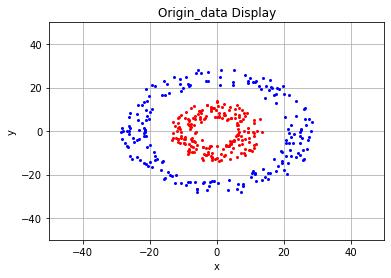

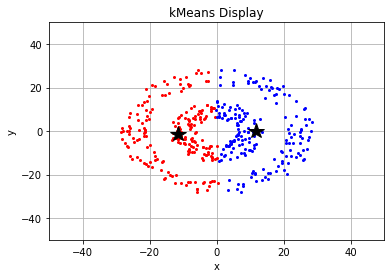

In [8]:
k=int(input('请输入K值：'))
data=data_new
origin=data.values #转换为数组类型进行处理
xy=origin[:,:2] #提取x,y
m,n=np.shape(xy) #获得每个维度个数
location=origin_location(xy,k)
location,num,cluster_data=cluster(location,xy)
print(f'聚类重心为：\n{location}\n一共计算了{num}次')
display(data,cluster_data)

此处：因为该聚类方法为距离分类，而并不是原数据的环状分类。故我们需要对数据进行特征变换，以得到环状的分类结果
<br/>
<br/>

## 2.极坐标变换进行聚类
说明：如图所示，极坐标即指各点到原点坐标的距离表示。

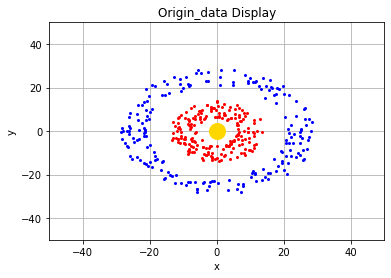

In [9]:
data=data_new
plt.axis([-50,50,-50,50])
ar=np.shape(data)
for i in range(ar[0]):
    if data['labelnum'][i]==0.0:
            plt.plot(data['x'][i],data['y'][i],'ro',markersize=2)
    else:
            plt.plot(data['x'][i],data['y'][i],'bo',markersize=2)
plt.plot(0,0,'o',markersize=16,color='gold')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Origin_data Display')
plt.show()

### (1) 导入第三方库(同上）

In [10]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import math

### (2) 导入数据并预处理(同上）
此处将原表格中数据进行标记，并储存为新数据然后再导入

In [11]:
data=pd.read_csv('dataset_circles.csv',header=None,names=['x','y','labelnum']) #给数据添加分类标签
data.to_csv('dataset_circles_labeled.csv',index=False)
data_new=pd.read_csv('dataset_circles_labeled.csv')
data=data_new


### (3) 定义极坐标变换函数

In [12]:
def polar_coordinate(data):
    m,n=np.shape(data) #获取每个维度长度
    ar=np.zeros((m,n))#创建m*n的空数组
    for i in range(m):
        r=np.sqrt(((data[i][0])**2) + ((data[i][1])**2))  #获得每个点与原点的距离
        theta=np.math.atan(data[i][1]/data[i][0]) #获得极坐标的theta角
        ar[i,:]=r,theta
    return ar
#print(data_polar) # For test

### (4) 定义距离计算函数（同上）

In [13]:
def distance(location ,dot):
    dist=(location-dot)**2
    dist_new=np.sum(dist,axis=1)
    return dist_new

### (5) 定义随机化初始重心函数(同上）

In [14]:
def origin_location(xy,k):
    origin_location_new=np.array([]) #初始化重心的数组
    for i in range(k): #随机获取重心，并将其连接为一个数组
        origin_location=xy[random.randint(0,m)]
        origin_location_new=np.concatenate((origin_location,origin_location_new),axis=0)
    origin_location_new=origin_location_new.reshape(-1,2) #将数组形状变为列为2
    print(f'随机选取的初始重心为：\n{origin_location_new}\n')
    return origin_location_new

### (6) 定义极坐标聚类函数

In [15]:
def cluster_polar(data,k,location_polar):
    m,n=np.shape(data)
    cluster_init=np.mat(np.zeros((m,2)))
    flags=1
    num=0
    while flags:
        flags=0
        for i in range(m):
            distance_new=distance(location_polar,data[i]) #对每个点求欧式距离
            distance_k=np.argmin(distance_new) #找到该点属于哪一个重心类
            if cluster_init[i,0]!=distance_k:
                flags =1
            cluster_init[i][0] = distance_k
        num+=1
        for j in range(k):
            location_new=data[np.nonzero(cluster_init[:,0].A==j)[0]] #已知每一样本的类，计算最新的聚类重心
            location_polar[j,:]=np.mean(location_new,axis=0)
    return location_polar,cluster_init,num

### (7) 定义绘图函数


In [16]:
def display(origin_data,cluster_data):
    visualise_data(origin_data)#原数据

    plt.axis([-50,50,-50,50]) #聚类
    color=['red','blue','gold','cyan','orchid','orange']
    for i in range(m):
        nn= int(cluster_data[i,0])
        plt.plot(xy[i,0],xy[i,1],'o', markersize=2,color=color[nn])
    for j in range(k):
        plt.plot(location_polar[j,0],location_polar[j,1],'*',markersize=16,color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title('Polar_cluster Display')
    plt.show()

 ### (8) 运行并确定K值

请输入K值：2
随机选取的初始重心为：
[[22.4133864  -1.1941232 ]
 [13.4430025  -1.27487094]]

聚类重心极坐标为：
[[24.99591265  0.02977579]
 [10.0598988   0.03273353]]
一共计算了2次


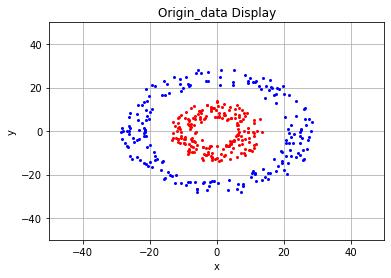

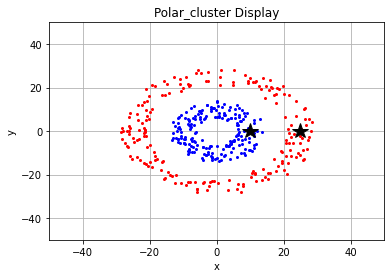

In [17]:
k=int(input('请输入K值：'))
origin=data.values #转换为数组类型计算
xy=origin[:,:2] #提取x,y
m,n=np.shape(data)
data_polar=polar_coordinate(xy) #进行极坐标变换（利用上述定义函数）
location_polar=origin_location(data_polar,k) #获得随机初始的重心点(注：此处用变换后的data_polar)
location_polar,cluster_data,num=cluster_polar(data_polar,k,location_polar)
print(f'聚类重心极坐标为：\n{location_polar}\n一共计算了{num}次')
display(data,cluster_data)

<br/>
<br/>

## 3.Spectral Clustering(谱聚类)


谱聚类（spectral clustering）是广泛使用的聚类算法，比起传统的K-Means算法，谱聚类对数据分布的适应性更强，聚类效果也很优秀，同时聚类的计算量也小很多，并且实现起来也不复杂。

谱聚类是从图论中演化出来的算法，后来在聚类中得到了广泛的应用。它的主要思想是把所有的数据看做空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，通过对所有数据点组成的图进行切图，让切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高，从而达到聚类的目的。

谱聚类算法的主要优点有：
1）谱聚类只需要数据之间的相似度矩阵，因此对于处理稀疏数据的聚类很有效。这点传统聚类算法比如K-Means很难做到
2）由于使用了降维，因此在处理高维数据聚类时的复杂度比传统聚类算法好。
谱聚类算法的主要缺点有：
1）如果最终聚类的维度非常高，则由于降维的幅度不够，谱聚类的运行速度和最后的聚类效果均不好。
2) 聚类效果依赖于相似矩阵，不同的相似矩阵得到的最终聚类效果可能很不同。


### (1) 导入第三方库

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import SpectralClustering

### (2) 读取数据并预处理

In [19]:
data=pd.read_csv('dataset_circles.csv',header=None,names=['x','y','labelnum']) #给数据添加分类标签
data.to_csv('dataset_circles_labeled.csv',index=False) #储存为新文件
data_new=pd.read_csv('dataset_circles_labeled.csv')
data=data_new
origin=data.values #转换为数组类型进行处理
xy=origin[:,:2] #提取x,y

### (3) SC谱聚类算法

In [20]:
k=int(input('请输入K值：'))
sc=SpectralClustering(n_clusters=k,affinity='nearest_neighbors')
sc_cluster=sc.fit_predict(xy)
# print(sc_cluster) # For test

请输入K值：2


### (4) 可视化

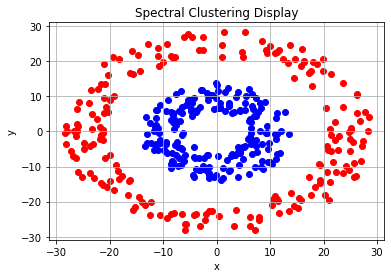

In [21]:
color=['red','blue','gold','cyan','orchid','orange']
for i in range(len(xy)):
    plt.scatter(xy[i][0],xy[i][1],color=color[(sc_cluster[i])])  #根据分类数值不一样，绘制的颜色索引不一样
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Spectral Clustering Display')
plt.show()

<br/>
<br/>

## 4.DBSCAN算法(密度聚类算法)

DBSCAN是一种基于密度的聚类算法，这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。同一类别的样本，他们之间的紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。通过将紧密相连的样本划为一类，这样就得到了一个聚类类别。通过将所有各组紧密相连的样本划为各个不同的类别，则我们就得到了最终的所有聚类类别结果。

形象来说，我们可以认为这是系统在众多样本点中随机选中一个，围绕这个被选中的样本点画一个圆，规定这个圆的半径以及圆内最少包含的样本点，如果在指定半径内有足够多的样本点在内，那么这个圆圈的圆心就转移到这个内部样本点，继续去圈附近其它的样本点。等到这个圈发现所圈住的样本点数量少于预先指定的值，就停止了。那么我们称最开始那个点为核心点，停下来的那个点为边界点，没有在圈里的那个点为离群点。

参数：  
eps：epsilon,圈半径  
min_samples:圈内圈住个数


### (1) 导入第三方库

In [22]:
import pandas as pd
from sklearn.cluster import DBSCAN

### (2)读取数据预处理

In [23]:
data=pd.read_csv('dataset_circles.csv',header=None,names=['x','y','labelnum'])

### (3) DBSCAN算法

In [24]:
db=DBSCAN(eps=6,min_samples=6).fit(data)
labelnum=db.labels_  #将分类的标签生成为列表
#print(labelnum) #For test

### (4) 可视化

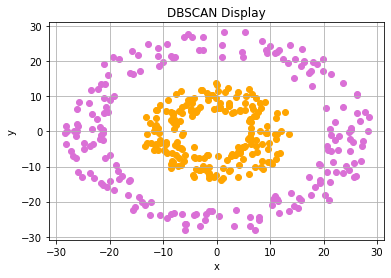

In [25]:
color=['orchid','orange','red','blue','gold','cyan']
for i in range(len(xy)):
    plt.scatter(xy[i][0],xy[i][1],color=color[(sc_cluster[i])])  #根据分类数值不一样，绘制的颜色索引不一样
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('DBSCAN Display')
plt.show()

此处：由于DBSCAN不用输入K的值，是根据圆圈半径大小以及圆圈内样本数为依据，所以eps,min_samples两个参数很重要，且参数大小需把握好。